In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# Load data
df = pd.read_csv("../materials.csv")



In [4]:
df.dropna(inplace=True)
df.drop(columns=['material_id', 'formula_pretty', 'Unnamed: 0'], axis=1, inplace=True)



In [5]:
# Encode categorical features
label_encoder = LabelEncoder()
df['is_magnetic'] = label_encoder.fit_transform(df['is_magnetic'])
df['ordering'] = label_encoder.fit_transform(df['ordering'])



In [6]:
# Preprocess data
X = df.drop(columns=["band_gap"])
y = df["band_gap"]



In [7]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [9]:
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [13]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.3692611695210911
Mean Absolute Error: 0.3155830499970966
R² Score: 0.7927638336562708


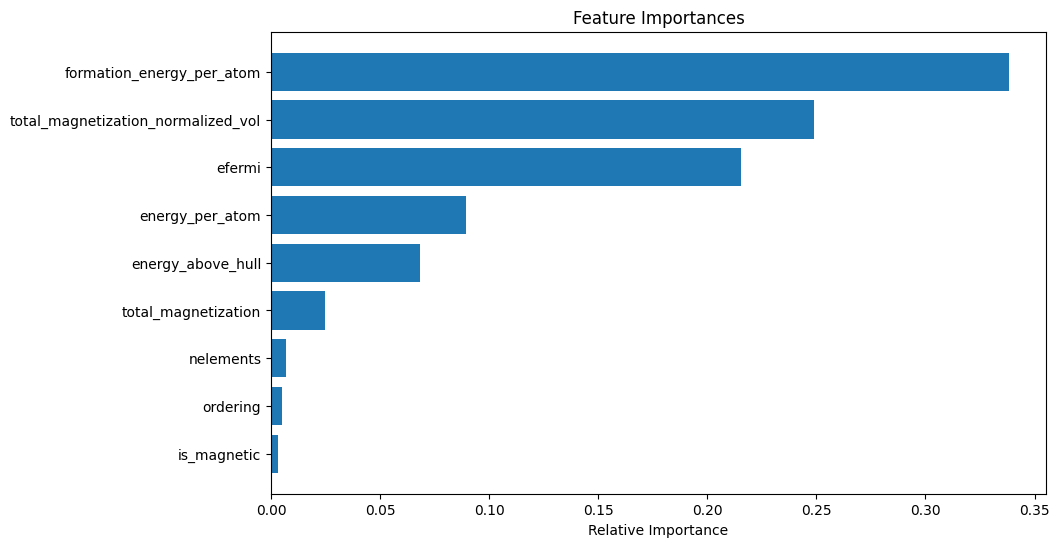

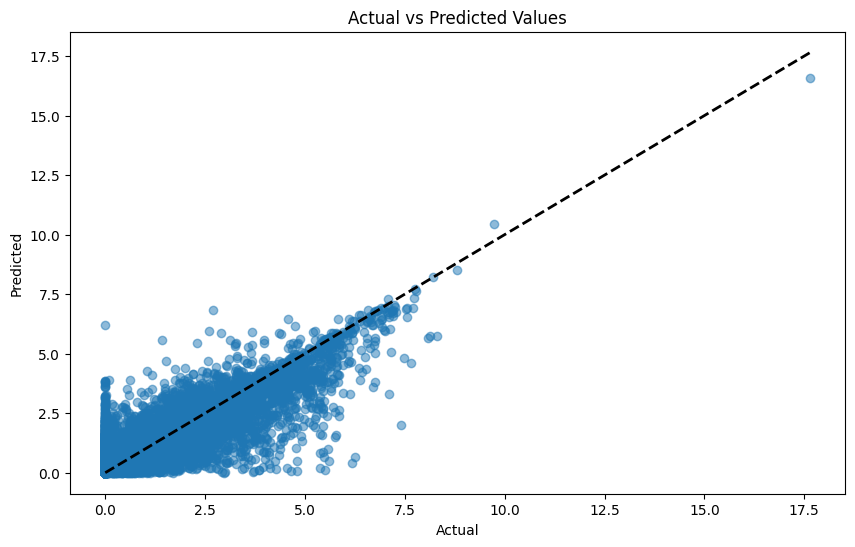

In [17]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()